In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
from google.colab import files
uploaded = files.upload()

Saving cereal.csv to cereal.csv


In [3]:
def overview():
    data = pd.read_csv("cereal.csv")
    print("The first 5 rows of data are:\n")
    print(data.head)
    print("\n\n\nDataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n\n\nDatatype: \n")
    print(data.dtypes)
    print("\n\n\nThe number of null values for each column are: \n")
    print(data.isnull().sum())
    print("\n\n\nData summary: \n")
    print(data.describe())
    return data
data = overview()

The first 5 rows of data are:

<bound method NDFrame.head of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110

In [4]:
# Count the number of -1 in carbo, sugars and potass column
data[data == -1].count(axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [5]:
# Remove affected rows
data = data[(data.carbo >= 0) & (data.sugars >= 0) & (data.potass >= 0)]
data[data == -1].count(axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [6]:
# Counting number of manufacturers
data['mfr'].value_counts()

mfr
K    23
G    22
P     9
Q     7
R     7
N     5
A     1
Name: count, dtype: int64

<Axes: xlabel='mfr', ylabel='rating'>

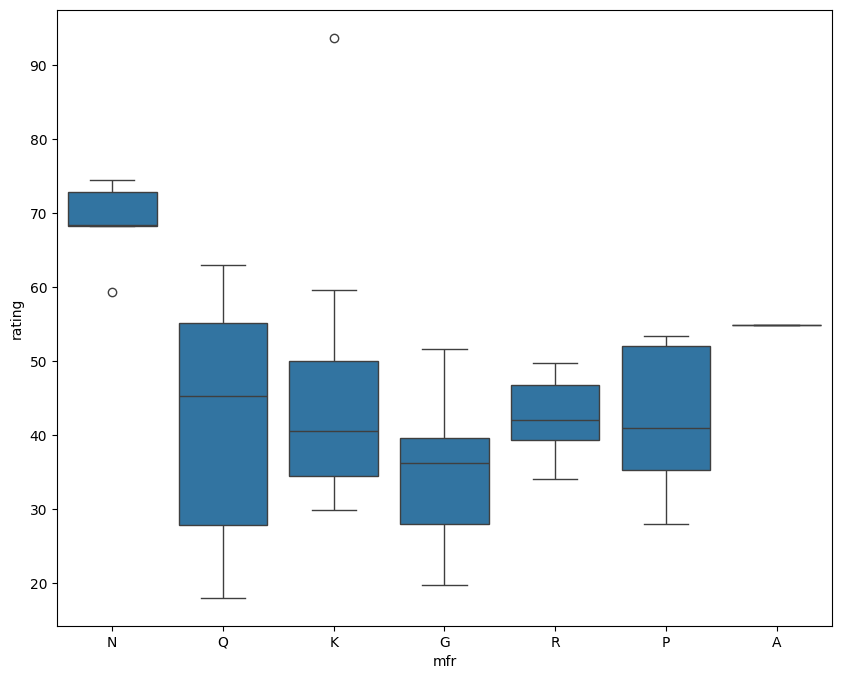

In [7]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = data, x = "mfr", y = "rating")


In [8]:
# Finding out what are the 4 Nabisco cereals that have high ratings
data.loc[data['mfr'] == "N"]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.00,1.00,59.363993


In [9]:
# Lowest rating cereal
data.loc[data['rating'] == min(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851


In [10]:
# Best rating cereal
data.loc[data['rating'] == max(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


In [11]:
print(data['type'].value_counts())
data.loc[data['type'] == "H"]

type
C    73
H     1
Name: count, dtype: int64


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.0,54.850917


Text(0.5, 1.0, 'Carbs')

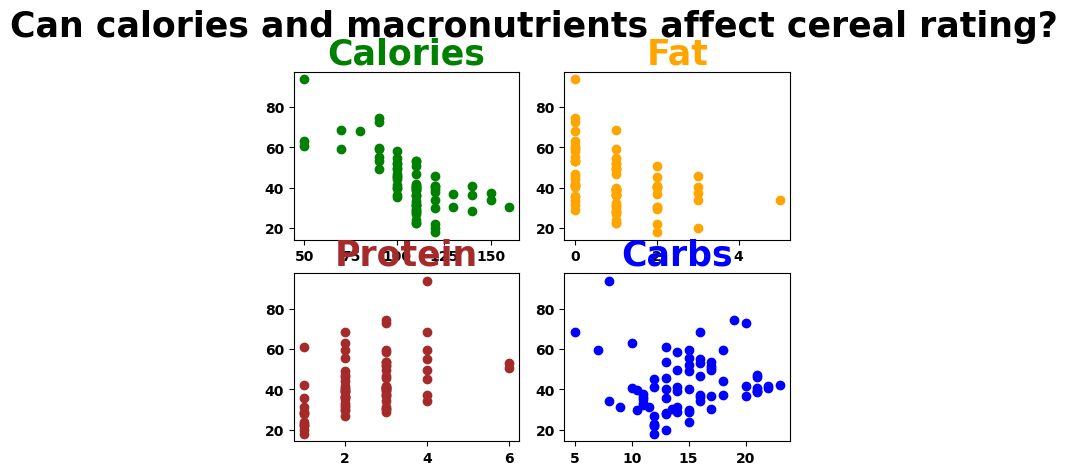

In [12]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Can calories and macronutrients affect cereal rating?', fontsize=25,fontweight="bold", color="black",
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('calories', 'rating', data= data, c="green")
ax1.set_title('Calories', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="orange")
ax2.set_title('Fat', fontdict=fontdict, color="orange")


ax3 = fig.add_subplot(223)
ax3.scatter('protein', 'rating', data=data, c="brown")
ax3.set_title('Protein', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('carbo', 'rating', data=data, c="blue")
ax4.set_title("Carbs", fontdict=fontdict, color="blue")

Text(0.5, 1.0, 'Vitamins')

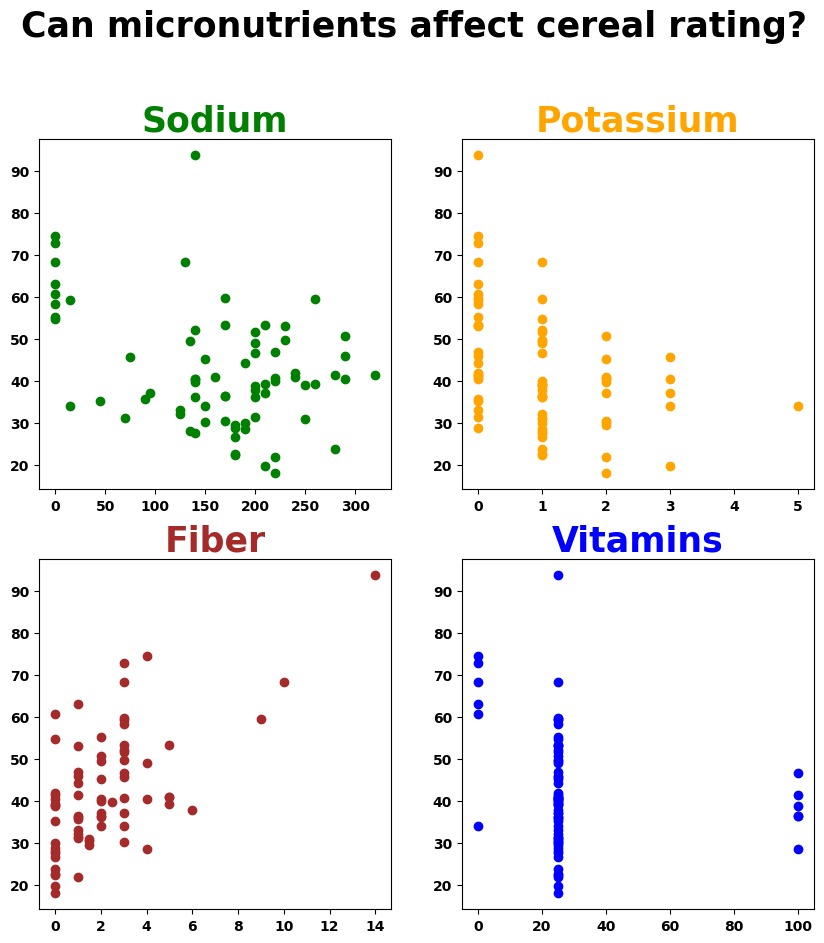

In [13]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Can micronutrients affect cereal rating?', fontsize=25,fontweight="bold", color="black",
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('sodium', 'rating', data= data, c="green")
ax1.set_title('Sodium', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="orange")
ax2.set_title('Potassium', fontdict=fontdict, color="orange")


ax3 = fig.add_subplot(223)
ax3.scatter('fiber', 'rating', data=data, c="brown")
ax3.set_title('Fiber', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('vitamins', 'rating', data=data, c="blue")
ax4.set_title("Vitamins", fontdict=fontdict, color="blue")

Text(0.5, 1.0, 'Cups per serving')

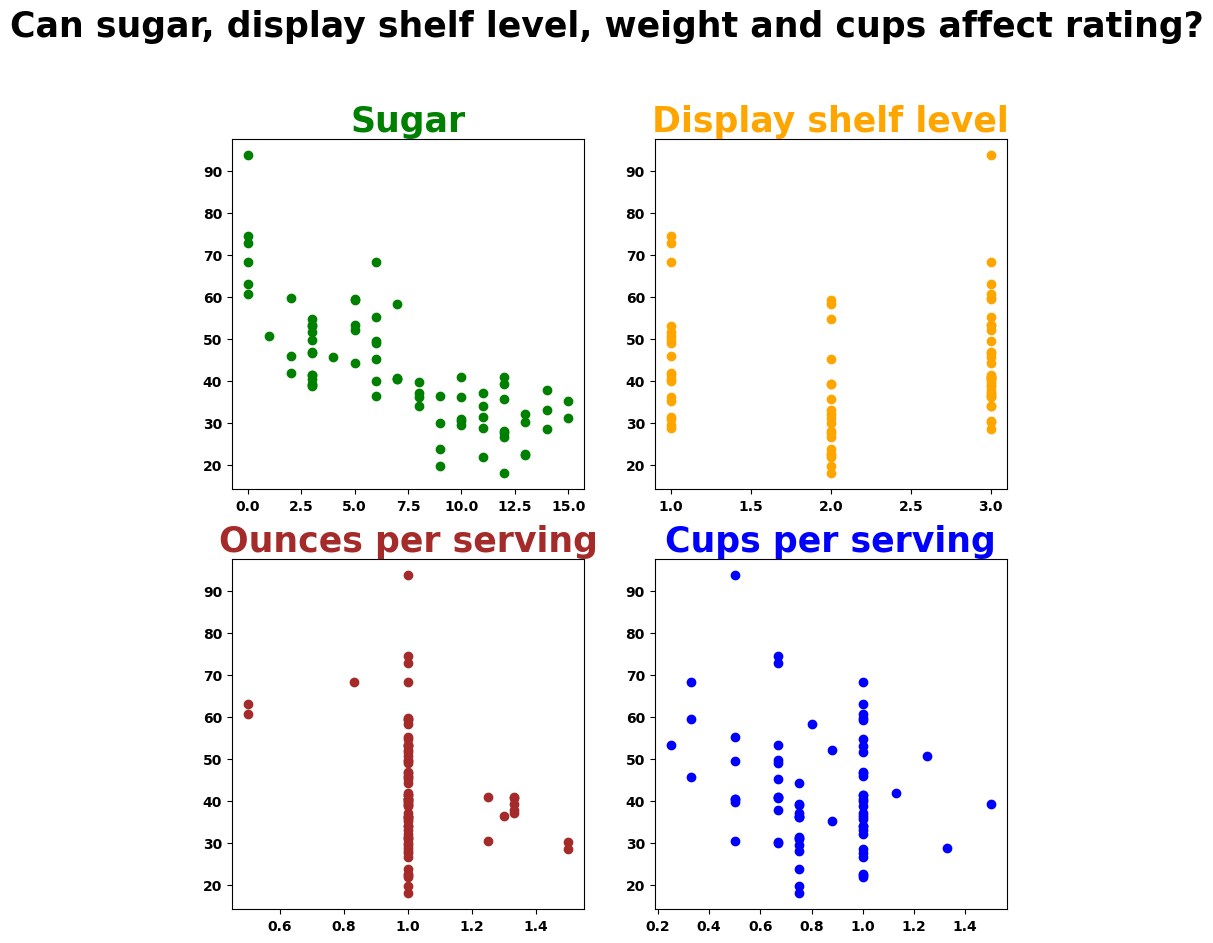

In [14]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Can sugar, display shelf level, weight and cups affect rating?', fontsize=25,fontweight="bold", color="black",
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('sugars', 'rating', data= data, c="green")
ax1.set_title('Sugar', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('shelf', 'rating', data=data, c="orange")
ax2.set_title('Display shelf level', fontdict=fontdict, color="orange")


ax3 = fig.add_subplot(223)
ax3.scatter('weight', 'rating', data=data, c="brown")
ax3.set_title('Ounces per serving', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('cups', 'rating', data=data, c="blue")
ax4.set_title("Cups per serving", fontdict=fontdict, color="blue")

In [19]:
# Use label encoder on categorical data
le = LabelEncoder()

# Implementing LE on mfr
le.fit(data.mfr.drop_duplicates())
data.mfr = le.transform(data.mfr)

# Implementing LE on type
le.fit(data.type.drop_duplicates())
data.type = le.transform(data.type)

In [21]:
# Creating training and testing dataset
y = data['rating']
X = data.drop(['rating', 'name'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.9999999999999993
